In [30]:
import bootcampviztools as bt
from toolbox_ML import describe_df, tipifica_variables, get_features_num_regression, plot_features_num_regression, get_features_cat_regression, plot_features_cat_regression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
pd.options.mode.copy_on_write = True

### Importar datos

In [48]:
df = pd.read_csv("../data_sample/Superstore.csv", encoding="latin1")
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [54]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Creación del target

In [55]:
def clasificar_profit(x):
    if x > 0:
        return "beneficio"
    else:
        return "perdida"

df["Profit_Class"] = df["Profit"].apply(clasificar_profit)

In [56]:
df = df.drop(columns=["Profit"])

In [58]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit_Class
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,beneficio
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,beneficio
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,beneficio
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,perdida
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,beneficio


### Dividir X_train, X_test, y_train, y_test

In [ ]:
X = df.drop(["Profit_Class"], axis=1)
y = df["Profit_Class"].copy()

(9994, 20)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify=y)

In [63]:
X_train.shape

(7995, 20)

In [64]:
X_test.shape

(1999, 20)

### Procesado de datos

#### Distribución del target

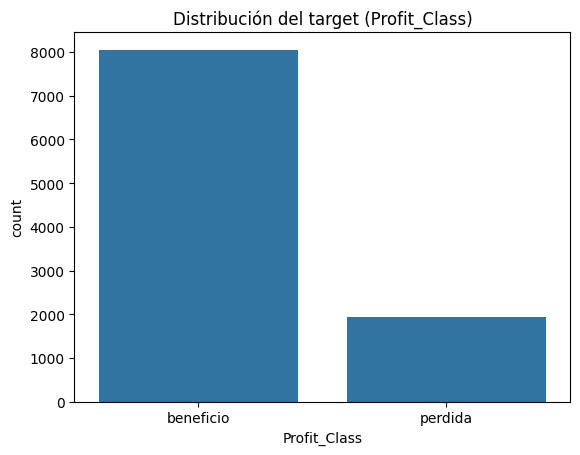

In [65]:
sns.countplot(data=df, x="Profit_Class")
plt.title("Distribución del target (Profit_Class)")
plt.show()

#### Transformación de variables

In [70]:
describe_df(X_train)

,DATA_TYPE,MISSINGS (%),UNIQUE_VALUES,CARDIN (%)
Row ID,int64,0.0,7995,100.00
Sales,float64,0.0,5009,62.65
Order ID,object,0.0,4442,55.56
Product ID,object,0.0,1841,23.03
Product Name,object,0.0,1830,22.89
Ship Date,object,0.0,1300,16.26
Order Date,object,0.0,1201,15.02
Customer ID,object,0.0,789,9.87
Customer Name,object,0.0,789,9.87
Postal Code,int64,0.0,612,7.65


##### Eliminamos variables con alta cardinalidad o que no le aporten información al modelo

In [71]:
cols_to_drop = ["Row ID", "Order ID", "Product ID","Customer ID"]
X_train = X_train.drop(columns=cols_to_drop, errors="ignore") # -> sirve para evitar que si una columna no esta presente en el otro set no nos de error
X_test = X_test.drop(columns=cols_to_drop, errors="ignore")

In [72]:
X_train.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount
6142,7/9/2017,7/15/2017,Standard Class,Jamie Frazer,Consumer,United States,Manchester,Connecticut,6040,East,Technology,Phones,Digium D40 VoIP phone,257.980,2,0.0
2456,3/17/2017,3/22/2017,Second Class,Denny Blanton,Consumer,United States,New York City,New York,10011,East,Office Supplies,Labels,Avery 486,7.310,1,0.0
9234,9/2/2016,9/6/2016,Standard Class,Lena Radford,Consumer,United States,Los Angeles,California,90036,West,Technology,Phones,Cisco Unified IP Phone 7945G VoIP phone,1091.168,4,0.2
1458,9/25/2016,10/1/2016,Standard Class,Nicole Hansen,Corporate,United States,Irving,Texas,75061,Central,Office Supplies,Labels,Avery 499,15.936,4,0.2
6787,9/13/2015,9/20/2015,Standard Class,Jonathan Howell,Consumer,United States,Atlanta,Georgia,30318,South,Furniture,Furnishings,Eldon Advantage Chair Mats for Low to Medium P...,129.930,3,0.0


#### Procesado de features categóricas

In [73]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7995 entries, 6142 to 9623
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order Date     7995 non-null   object 
 1   Ship Date      7995 non-null   object 
 2   Ship Mode      7995 non-null   object 
 3   Customer Name  7995 non-null   object 
 4   Segment        7995 non-null   object 
 5   Country        7995 non-null   object 
 6   City           7995 non-null   object 
 7   State          7995 non-null   object 
 8   Postal Code    7995 non-null   int64  
 9   Region         7995 non-null   object 
 10  Category       7995 non-null   object 
 11  Sub-Category   7995 non-null   object 
 12  Product Name   7995 non-null   object 
 13  Sales          7995 non-null   float64
 14  Quantity       7995 non-null   int64  
 15  Discount       7995 non-null   float64
dtypes: float64(2), int64(2), object(12)
memory usage: 1.0+ MB


In [74]:
X_train["Ship Mode"].value_counts()

Ship Mode
Standard Class    4766
Second Class      1564
First Class       1230
Same Day           435
Name: count, dtype: int64